# Predicting Heart Disease Using Classification 

## Introduction 

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. One of the best ways to reduce the mortality and severity of heart diseases is early detection of the same in an individual. In this project, we seek to utilise some commonly available medical metrics to predict whether an individual has heart disease or not. 

The dataset required to train our model has been taken from the UCI Machine Learning Repository and is made up of data collected from 4 different places across the world. The database involves variables such as age, sex, cholestoral and blood pressure etc. and a final column which classifies the presence of heart disease on a scale of 0 to 4 where 0 represents absence of heart disease and 1-4 represnets presence of heart disease. 


## Preliminary exploratory data analysis:

In [32]:
# loading all the required libraries. 
library(tidyverse) 
library(dplyr)
library(tidymodels) 
library(gridExtra)
library(repr)
set.seed(1)

In [33]:
#loading the required datasets and merging them
heart_data1 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names=FALSE)
heart_data2 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names=FALSE)
heart_data3 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=FALSE)
heart_data4 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names=FALSE)

hungarian_data <- heart_data1 %>%
    mutate (location = "Hungarian")
cleveland_data <- heart_data1 %>%
    mutate (location = "Cleveland")
va_data <- heart_data1 %>%
    mutate (location = "Va")

#merging the data from the various cities 
heart_data <- rbind (hungarian_data, cleveland_data, va_data)
#adding column names to the data 
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num", "location")
#viewing the data
head(heart_data)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_d

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
28,1,2,130,132,0,2,185,0,0,?,?,?,0,Hungarian
29,1,2,120,243,0,0,160,0,0,?,?,?,0,Hungarian
29,1,2,140,?,0,0,170,0,0,?,?,?,0,Hungarian
30,0,1,170,237,0,1,170,0,0,?,?,6,0,Hungarian
31,0,2,100,219,0,1,150,0,0,?,?,?,0,Hungarian
32,0,2,105,198,0,0,165,0,0,?,?,?,0,Hungarian


In [34]:
#tidying the data further by modifying num column to show weather the patient has heart disease or not
num <- heart_data %>%
    select (num) %>%
    mutate (num = as.character (num))
num [num == "1"] <- "Y"
num [num == "2"] <- "Y"
num [num == "3"] <- "Y"
num [num == "4"] <- "Y"
num [num == "0"] <- "N"
num <- num %>%
 mutate (num = as_factor (num))
#selecting the required columns 
heart_data_selected <- heart_data%>%
    select (age, trestbps, chol, thalach, location)
#merging the data again 
heart_data_merged <- cbind(heart_data_selected, num) %>%
    rename ("heart_disease" = "num")
#changing the data types of some columns 
heart_data_final <- heart_data_merged %>%
     mutate (trestbps = as.numeric (trestbps),
            chol = as.numeric (chol),
            thalach = as.numeric (thalach))           
head(heart_data_final)

Warning message:
“Problem with `mutate()` input `trestbps`.
ℹ NAs introduced by coercion
ℹ Input `trestbps` is `as.numeric(trestbps)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `chol`.
ℹ NAs introduced by coercion
ℹ Input `chol` is `as.numeric(chol)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thalach`.
ℹ NAs introduced by coercion
ℹ Input `thalach` is `as.numeric(thalach)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


,age,trestbps,chol,thalach,location,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,28,130,132,185,Hungarian,N
2,29,120,243,160,Hungarian,N
3,29,140,NA,170,Hungarian,N
4,30,170,237,170,Hungarian,N
5,31,100,219,150,Hungarian,N
6,32,105,198,165,Hungarian,N


In [35]:
# seperating the data into different data set based on their location
hungarian_data_cleaned <- heart_data_final %>%
    filter (location == "Hungarian")

cleveland_data_cleaned <- heart_data_final %>%
    filter (location == "Cleveland")

va_data_cleaned <- heart_data_final %>%
    filter (location == "Va")

# spliting the data into training and testing for each of those locations

heart_data_split_hung <- initial_split(hungarian_data_cleaned, prop=.75, strata = heart_disease)
heart_data_training_hung <- training(heart_data_split_hung) 
heart_data_testing_hung <- testing(heart_data_split_hung)

heart_data_split_clev <- initial_split(cleveland_data_cleaned, prop=.75, strata = heart_disease)
heart_data_training_clev <- training(heart_data_split_clev) 
heart_data_testing_clev <- testing(heart_data_split_clev)

heart_data_split_va <- initial_split(va_data_cleaned, prop=.75, strata = heart_disease)
heart_data_training_va <- training(heart_data_split_va) 
heart_data_testing_va <- testing(heart_data_split_va)

#putting all of the training-set together
heart_data_training <- rbind (heart_data_training_hung, heart_data_training_clev, heart_data_training_va)
heart_data_training

#putting all of the testing-set together
heart_data_testing <- rbind (heart_data_testing_hung, heart_data_testing_clev, heart_data_testing_va)
heart_data_testing


,age,trestbps,chol,thalach,location,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,28,130,132,185,Hungarian,N
2,29,120,243,160,Hungarian,N
3,29,140,NA,170,Hungarian,N
4,30,170,237,170,Hungarian,N
5,31,100,219,150,Hungarian,N
6,32,105,198,165,Hungarian,N
8,32,125,254,155,Hungarian,N
9,33,120,298,185,Hungarian,N
10,34,130,161,190,Hungarian,N


,age,trestbps,chol,thalach,location,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
7,32,110,225,184,Hungarian,N
14,35,140,167,150,Hungarian,N
20,36,150,160,172,Hungarian,N
21,37,120,260,130,Hungarian,N
24,37,130,283,98,Hungarian,N
25,37,130,194,150,Hungarian,N
33,39,120,200,160,Hungarian,N
34,39,120,204,145,Hungarian,N
37,39,120,339,170,Hungarian,N


In [42]:
#summarizing the data 
#calculating the mean 
heart_data_cleaned_final <- heart_data_final %>%
    select (- location)


predictors_mean <- heart_data_training %>%
    summarize(across (age:thalach, mean, na.rm = TRUE))

#using pivot_longer to show the mean value of each column in a table
predictors_mean_final <- pivot_longer(predictors_mean, 
                               cols = age:thalach, 
                               names_to = "predictors",
                              values_to = "mean")
predictors_mean_final

#counting the missing data 
na_count <- map_df(heart_data_cleaned_final, ~sum(is.na(.)))
#using pivot_longer to show the number of NAs in a table
na_count_final <- pivot_longer(na_count,
                               cols = age:heart_disease,
                               names_to = "predictors",
                              values_to = "number_of_nas")
na_count_final

#Proportion of heart disease 
heart_disease_proportion <- heart_data_training %>%
    group_by (heart_disease) %>%
    summarize (observation_number = n()) %>%
    mutate (percent = 100*observation_number/nrow(heart_data_training))
heart_disease_proportion  

predictors,mean
<chr>,<dbl>
age,47.66063
trestbps,132.76970
chol,249.68750
thalach,139.70758


predictors,number_of_nas
<chr>,<int>
age,0
trestbps,3
chol,69
thalach,3
heart_disease,0


`summarise()` ungrouping output (override with `.groups` argument)



heart_disease,observation_number,percent
<fct>,<int>,<dbl>
N,423,63.8009
Y,240,36.1991


Warning message:
“Removed 55 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 55 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”


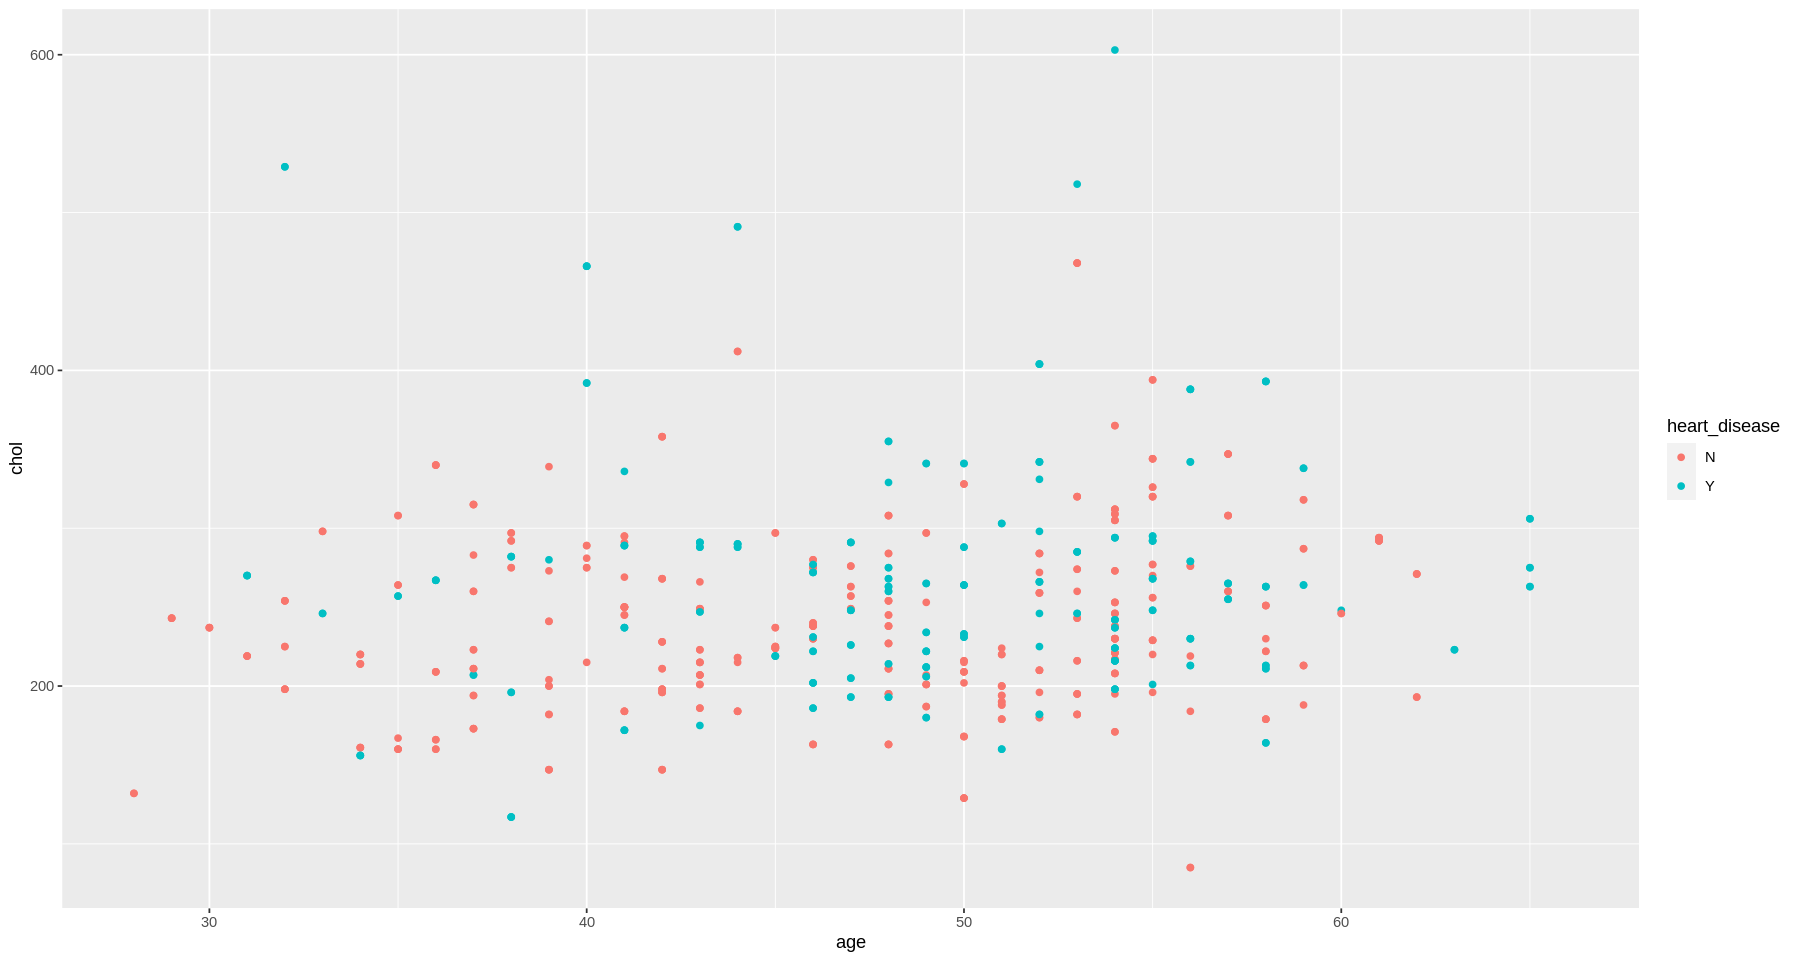

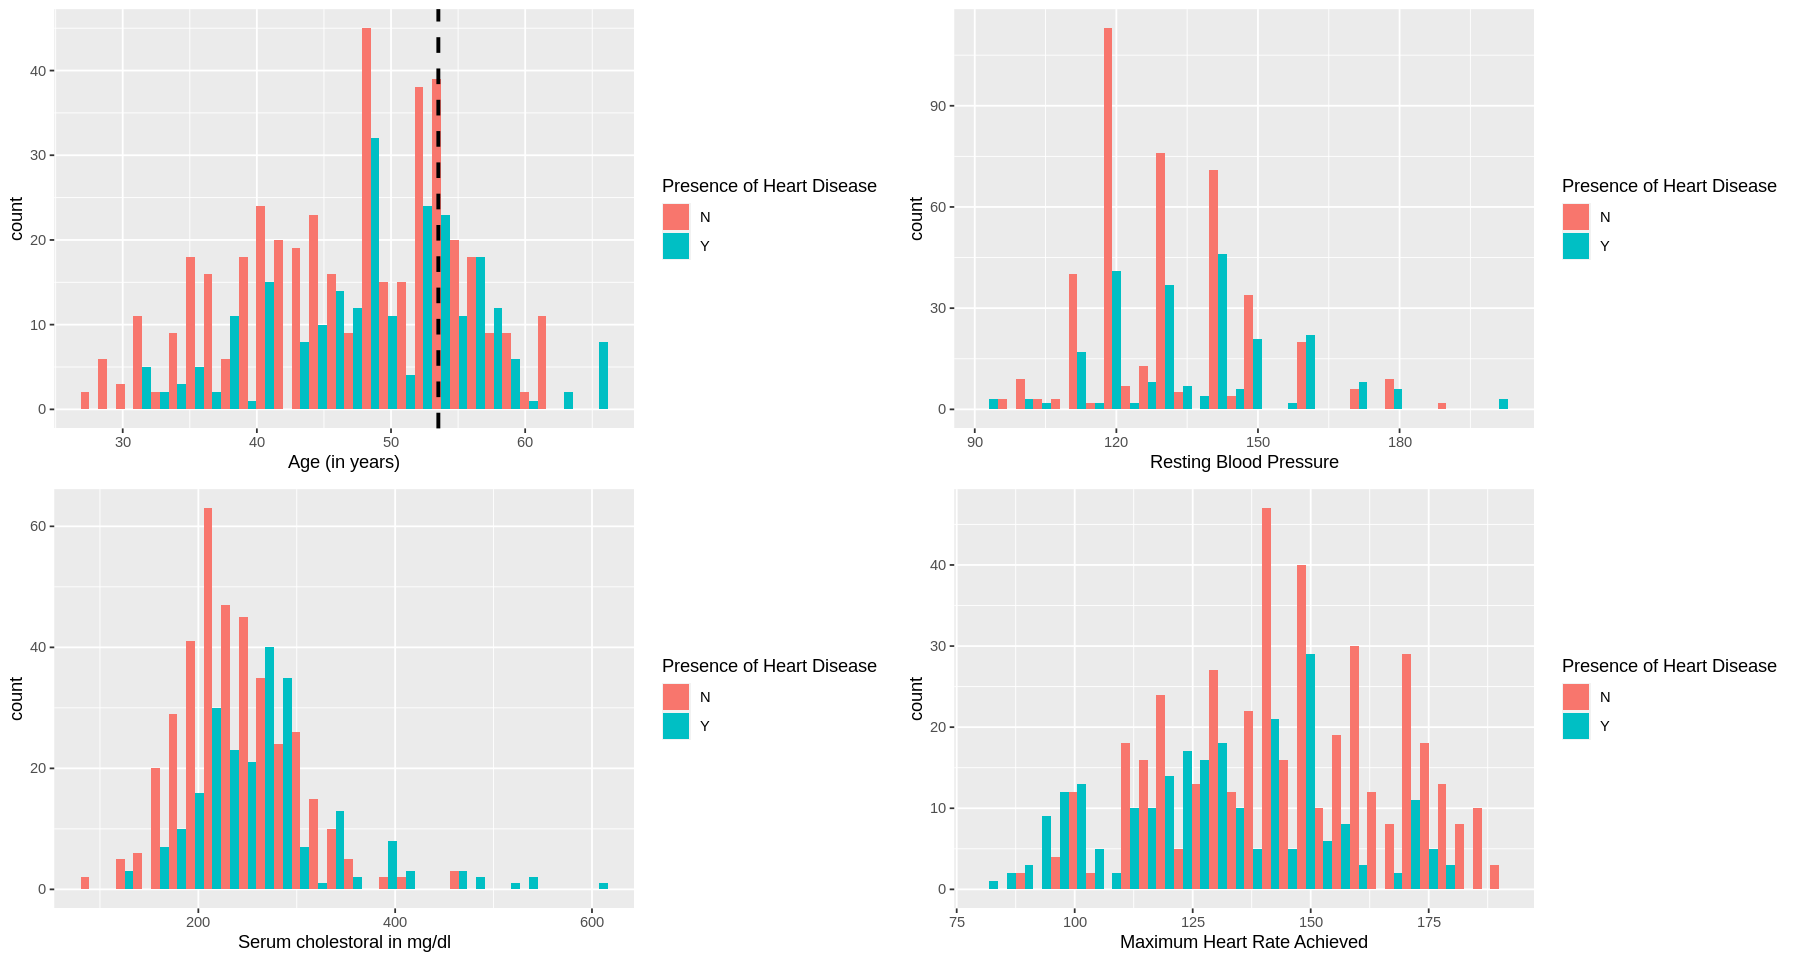

In [50]:
#visualising the data 

#changing the plot size 
options(repr.plot.height = 8, repr.plot.width=15)

#part 1: geom-points

age_plot1 <- heart_data_training %>% 
ggplot(aes(x = age, y = chol, color = heart_disease)) + 
geom_point(stat = "identity")  

age_plot1



age_plot <- heart_data_training %>% 
ggplot(aes(x = age, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") + 
geom_vline(xintercept = 53.5283, linetype="dashed", size = 1.1)+
labs(x="Age (in years)", fill = "Presence of Heart Disease")

trest_bps_plot <- heart_data_training %>% 
ggplot(aes(x = trestbps, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") +
labs(x="Resting Blood Pressure", fill = "Presence of Heart Disease")

chol_plot <- heart_data_training %>% 
ggplot(aes(x = chol, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") + 
labs(x="Serum cholestoral in mg/dl", fill = "Presence of Heart Disease")

thalach_plot <- heart_data_training %>% 
ggplot(aes(x = thalach, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") +
labs(x = "Maximum Heart Rate Achieved", fill = "Presence of Heart Disease")

#presenting the data in a grid 
grid.arrange(age_plot, trest_bps_plot, chol_plot, thalach_plot, nrow=2)

## Methods 
The variables we plan on using in our model are: 
1. Age - As we can see from the visualisation above, the distribution of people with high heart disease is much higher in the 55+ age range. There is definite correlation between age and risk of heart disease. 
2. 

## Expected Outcomes and Significance 